In [94]:
import numpy as np
import pandas as pd

In [95]:
dataset_path ="tweet.csv"
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(dataset_path, encoding =DATASET_ENCODING , names=DATASET_COLUMNS)
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [96]:
df["target"].value_counts()

4    800000
0    800000
Name: target, dtype: int64

In [97]:
df['target'].value_counts(normalize=True)

4    0.5
0    0.5
Name: target, dtype: float64

In [98]:
df=df.drop(labels=["ids","date"], axis=1)
df=df.drop(labels=["flag","user"], axis=1)
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


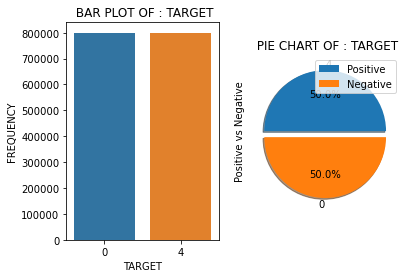

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(1,2,1)
sns.countplot(x="target", data=df)
plt.xlabel("TARGET")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF : TARGET")


plt.subplot(1,2,2)
plt.title(" PIE CHART OF : TARGET")
df["target"].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%1.1f%%', shadow = True)
plt.ylabel("Positive vs Negative")
plt.legend(["Positive", "Negative"])


plt.show()

In [100]:
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.corpus import stopwords
import nltk

In [101]:
df_negative = df.loc[df['target']==0, :]
df_negative = df_negative.iloc[:10000]
df_negative.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [102]:
Negative_words = ' '.join(df_negative['text'])
Negative_words[:2000]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds my whole body feels itchy and like its on fire  @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  @Kwesidei not the whole crew  Need a hug  @LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ? @Tatiana_K nope they didn't have it  @twittera que me muera ?  spring break in plain city... it's snowing  I just re-pierced my ears  @caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . . @octolinz16 It it counts, idk why I did either. you never talk to me anymore  @smarrison i would've been the first, but i didn't have a gun.    not re

In [103]:
cleaned_N = " ".join([word for word in Negative_words.split()
                            if 'http' not in word 
                                and not word.startswith('@')
                                and word != 'RT'
                                and word!=STOPWORDS
                            ])
cleaned_N[:5000]

"- Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah! I dived many times for the ball. Managed to save 50% The rest go out of bounds my whole body feels itchy and like its on fire no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. not the whole crew Need a hug hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ? nope they didn't have it que me muera ? spring break in plain city... it's snowing I just re-pierced my ears I couldn't bear to watch it. And I thought the UA loss was embarrassing . . . . . It it counts, idk why I did either. you never talk to me anymore i would've been the first, but i didn't have a gun. not really though, zac snyder's just a doucheclown. I wish I got to watch it with you!! I miss you and how was the premiere?! Hollis' death scene will hurt me sever

In [104]:
wordcloud_Negative = WordCloud(
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_N)

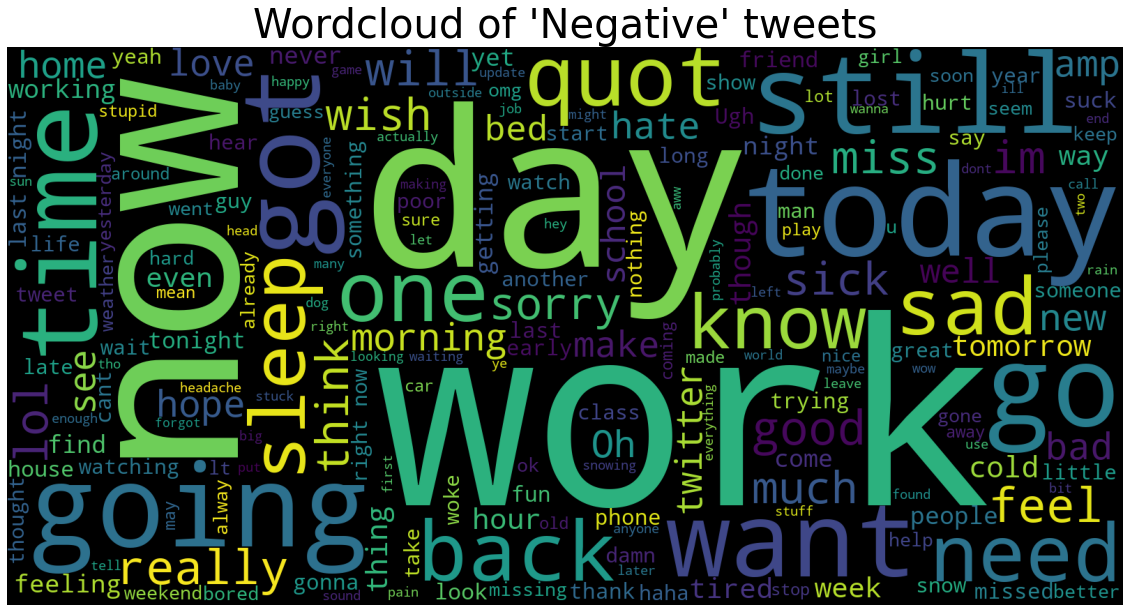

In [105]:
plt.figure(1,figsize=(20,30))
plt.title("Wordcloud of 'Negative' tweets",fontsize=40)
plt.imshow(wordcloud_Negative)
plt.axis('off')
plt.show()


In [106]:
df_positive = df.loc[df['target']==4, :]
df_positive = df_positive.iloc[:10000]
df_positive.head()

,target,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


In [107]:
Positive_words = ' '.join(df_positive['text'])
Positive_words[:10000]

"I LOVE @Health4UandPets u guys r the best!!  im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!! @DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.  Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup @LovesBrooklyn2 he has that effect on everyone  @ProductOfFear You can tell him that I just burst out laughing really loud because of that  Thanks for making me come out of my sulk! @r_keith_hill Thans for your response. Ihad already find this answer  @KeepinUpWKris I am so jealous, hope you had a great time in vegas! how did you like the ACM's?! LOVE YOUR SHOW!!  @tommcfly ah, congrats mr fletcher for finally joining twitter  @e4VoIP I RESPONDED  Stupid cat is helping me type. Forgive errors  crazy day of school. there for 10 hours straiiight. about to watch the hills. @spencerpratt told me too! ha. happy birthday JB!  @naughtyha

In [108]:
cleaned_P = " ".join([word for word in Positive_words.split()
                            if 'http' not in word 
                                and not word.startswith('@')
                                and word != 'RT'
                                and word!=STOPWORDS
                            ])
cleaned_P[:5000]

"I LOVE u guys r the best!! im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!! Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup he has that effect on everyone You can tell him that I just burst out laughing really loud because of that Thanks for making me come out of my sulk! Thans for your response. Ihad already find this answer I am so jealous, hope you had a great time in vegas! how did you like the ACM's?! LOVE YOUR SHOW!! ah, congrats mr fletcher for finally joining twitter I RESPONDED Stupid cat is helping me type. Forgive errors crazy day of school. there for 10 hours straiiight. about to watch the hills. told me too! ha. happy birthday JB! HOW DID I FORGET ABOUT TWO AND A HALF MEN?!?!? I LOVE THAT SHOW!!! Haha, don't worry! You'll get the hang of it! At least I won't be the only one fe

In [109]:
wordcloud_Positive = WordCloud(
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_P)

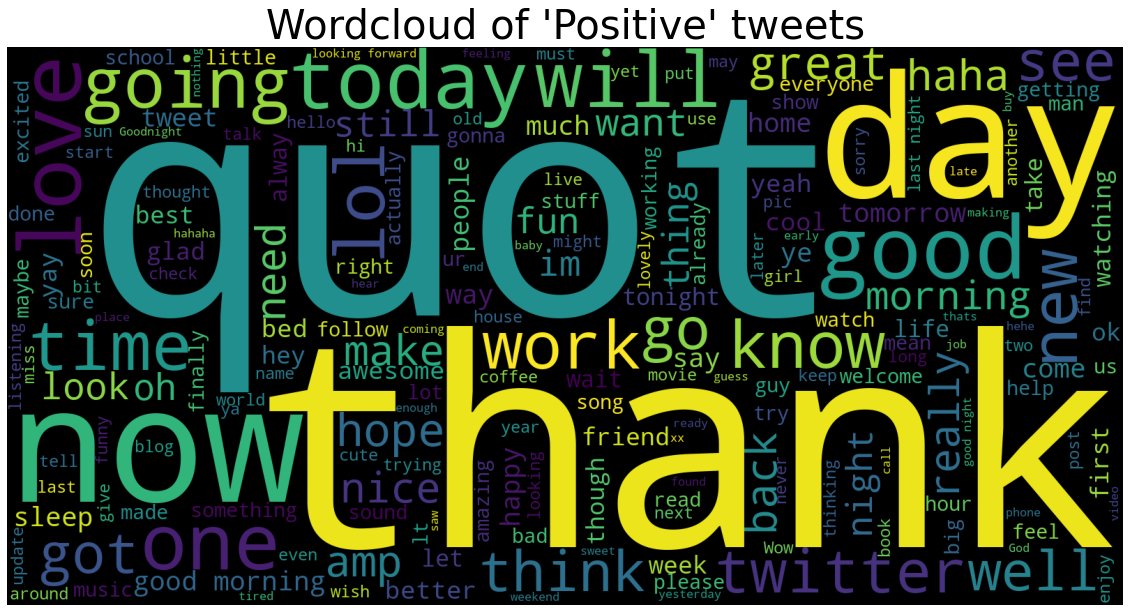

In [110]:
plt.figure(1,figsize=(20,30))
plt.title("Wordcloud of 'Positive' tweets",fontsize=40)
plt.imshow(wordcloud_Positive)
plt.axis('off')
plt.show()

In [111]:
df=df_negative.append(df_positive)
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
809995,4,Morning! I have slacked for two days in twitte...
809996,4,@bensummers Isn't that sweet of them.... Altru...
809997,4,"@jakrose Um, milk *fathers* don't have udders...."
809998,4,@zenaweist They could also tweet @BeccaRoberts


In [112]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [113]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [114]:
# initializse the inbuilt Lemmatizer 
lemmatizer = WordNetLemmatizer()

In [115]:
# initializing the lists

clean_tweet_lst = []

tweet_len_lst = []

In [116]:
def preprocess(raw_tweet, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_tweet_lst.append(" ".join(words))
    
    tweet_len_lst.append(len(words))

In [117]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

c:\python37\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [118]:
clean_tweet_lst = []

tweet_len_lst = []

df['text'].progress_apply(lambda x: preprocess(x, 'stem'))

df['clean_tweet_stem'] = clean_tweet_lst

df['tweet_length_stem'] = tweet_len_lst

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [03:31<00:00, 94.35it/s]


In [119]:
clean_tweet_lst = []

tweet_len_lst = []

df['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

df['clean_tweet_lema'] = clean_tweet_lst

df['tweet_length_lema'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [03:05<00:00, 107.85it/s]


In [120]:
df.head()

,target,text,clean_tweet_stem,tweet_length_stem,clean_tweet_lema,tweet_length_lema
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...,13,switchfoot http twitpic com zl awww bummer sho...,13
1,0,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...,11,upset update facebook texting might cry result...,11
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...,10,kenichan dived many time ball managed save res...,10
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire,6,whole body feel itchy like fire,6
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see,4,nationwideclass behaving mad see,4


In [121]:
from sklearn.model_selection  import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=42)

In [122]:
train_clean_tweet=[]
for tweet in train['clean_tweet_stem']:
    train_clean_tweet.append(tweet)

test_clean_tweet=[]
for tweet in test['clean_tweet_stem']:
    test_clean_tweet.append(tweet)

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))

train_features = vectorizer.fit_transform(train_clean_tweet)

test_features = vectorizer.transform(test_clean_tweet)

In [124]:
vectorizer.vocabulary_

{'part': 67024,
 'two': 95578,
 'hp': 41868,
 'saga': 76927,
 'black': 9116,
 'cartridg': 13039,
 'bought': 10268,
 'way': 99592,
 'back': 6162,
 'dri': 23684,
 'sinc': 81121,
 'actual': 506,
 'use': 97024,
 'printer': 70809,
 'gone': 35194,
 'part two': 67063,
 'two hp': 95603,
 'hp saga': 41872,
 'saga black': 76928,
 'black cartridg': 9124,
 'cartridg bought': 13040,
 'bought way': 10304,
 'way back': 99600,
 'back dri': 6222,
 'dri sinc': 23687,
 'sinc actual': 81123,
 'actual use': 594,
 'use printer': 97126,
 'printer gone': 70810,
 'mani': 55128,
 'question': 71880,
 'next': 62459,
 'battlest': 7209,
 'podcast': 69671,
 'best': 8154,
 'possibl': 70095,
 'answer': 3620,
 'mani question': 55176,
 'question next': 71896,
 'next battlest': 62463,
 'battlest podcast': 7210,
 'podcast best': 69673,
 'best possibl': 8223,
 'possibl answer': 70100,
 'put': 71604,
 'dog': 22726,
 'sleep': 81732,
 'like': 50519,
 'year': 104830,
 'trip': 94228,
 'everi': 26869,
 'time': 91503,
 'come': 16

In [125]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)


Total unique words: 105817
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (16000, 105817)


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [127]:
Classifiers = [LogisticRegression()]

In [128]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

In [129]:
test

,target,text,clean_tweet_stem,tweet_length_stem,clean_tweet_lema,tweet_length_lema
800650,4,Uploading photos first before leaving,upload photo first leav,4,uploading photo first leaving,4
2041,0,home with the flu ahhh suxz well and tired wi...,home flu ahhh suxz well tire go sleep hour goo...,10,home flu ahhh suxz well tired go sleep hour go...,10
8668,0,In floridaaaaaaaaaa. Too bad our tvs didn't wo...,floridaaaaaaaaaa bad tv work jet blue,6,floridaaaaaaaaaa bad tv work jet blue,6
1114,0,"got woken up this mornng at 7am - damn Lorry ,...",got woken mornng damn lorri van car accid outs...,16,got woken mornng damn lorry van car accident o...,16
803902,4,@jojo_1003 i guess a Iphone?,jojo guess iphon,3,jojo guess iphone,3
...,...,...,...,...,...,...
4073,0,im sick at home alone,im sick home alon,4,im sick home alone,4
7442,0,In History class. Learning about the slaves. I...,histori class learn slave bore,5,history class learning slave bored,5
9999,0,Its Another Rainboot day,anoth rainboot day,3,another rainboot day,3
1870,0,@anyshalyke oh you went clubbing without me ...,anyshalyk oh went club without lol next time t...,9,anyshalyke oh went clubbing without lol next t...,9


In [ ]:
for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['target'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['target'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

In [ ]:
dense_features = train_features.toarray()

model = LogisticRegression()

model.fit(dense_features,train['target'])

In [ ]:
from pickle import dump

dump(vectorizer, open('countvectorizer.pkl', 'wb'))

dump(model, open('logit_model.pkl', 'wb'))

In [ ]:
from pickle import load

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
def preprocess(raw_tweet):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    clean_sent = " ".join(words)
    
    return clean_sent

In [ ]:
def predict(tweet):
    
    # Loading pretrained CountVectorizer from pickle file
    vectorizer = load(open('countvectorizer.pkl', 'rb'))
    
    # Loading pretrained logistic classifier from pickle file
    classifier = load(open('logit_model.pkl', 'rb'))
    
    # Preprocessing the tweet
    clean_tweet = preprocess(tweet)
    
    # Converting text to numerical vector
    clean_tweet_encoded = vectorizer.transform([clean_tweet])
    
    # Converting sparse matrix to dense matrix
    tweet_input = clean_tweet_encoded.toarray()
    
    # Prediction
    prediction = classifier.predict(tweet_input)
    
    return prediction

In [ ]:
tweet = input("Enter a tweet to check its sentiment: ")

prediction = predict(tweet)

print(prediction)

In [ ]:
if(prediction == 0):
    print("Negative Sentiment")
else:
    print("Positive Sentiment")